# Chapter5. Regression(회귀)

### 5.4 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

In [4]:
from scipy import stats
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

In [5]:
# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


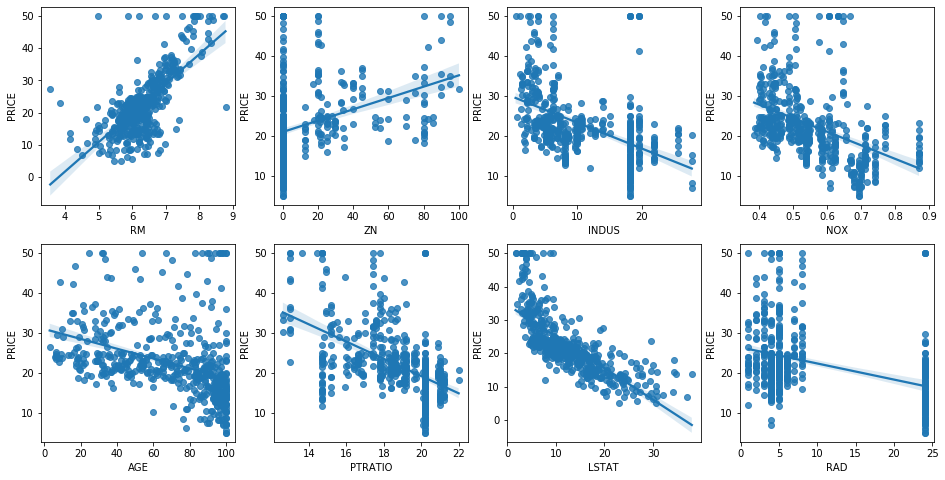

In [6]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [10]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [137]:
X = bostonDF['RM']
Y = boston.target

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.2, random_state=2019)

- 모델 불러와 객체 생성

In [139]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [140]:
sim_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
boston.data[:5, :]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [134]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- 결과 예측하기

In [141]:
y_pred = sim_lr.predict(x_test.values.reshape(-1,1))  ##x_train.values.reshape(-1,1)  ->일차원이라서 이렇게 함  (단일 회귀라서)

- 결과 확인하기

In [142]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1795128921483402

- 계수 w(weight), 절편 b(bias)

In [69]:
sim_lr.coef_, sim_lr.intercept_

(array([9.99002801]), -40.094059576934114)

- 도출한 회귀식:PRICE = 9.99*RM -40.09

- 산점도와 회귀선 그리기

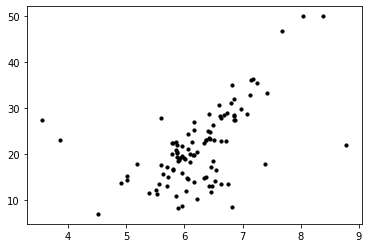

In [71]:
plt.scatter(x_test, y_test, s =10, c='black')
plt.show()

In [72]:
line_x = np.linspace(np.min(x_test), np.max(x_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

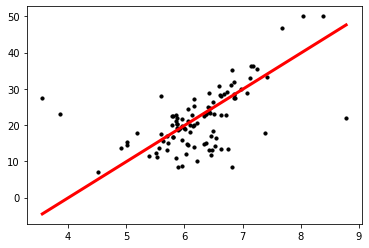

In [73]:
plt.scatter(x_test, y_test, s =10, c='black')
plt.plot(line_x,line_y, c='red', lw=3)
plt.show()

In [ ]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = [4, 8]
y1 = 4*w + b
y2 = 8 * w + b

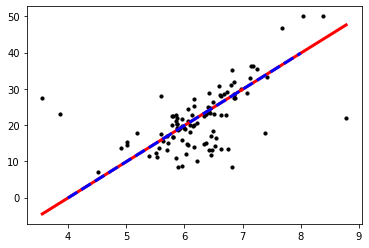

In [78]:
plt.scatter(x_test, y_test, s =10, c='black')
plt.plot(line_x,line_y, c='red', lw=3)
plt.plot(xs, [y1, y2], c='blue', lw=3, ls='--')
plt.show()

In [77]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
#xs = [4, 8]
#y1 = 4*w + b
#y2 = 8 * w + b
xs = np.array([4,8])
ys = xs * w +b

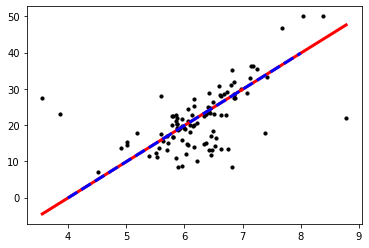

In [76]:
plt.scatter(x_test, y_test, s =10, c='black')
plt.plot(line_x,line_y, c='red', lw=3)
plt.plot(xs, ys, c='blue', lw=3, ls='--')
plt.show()

### PRICE vs LSTAT

In [112]:
# 그래프에 한글 표시
# Matplotlib 사용과 한글 처리를 위한 Code
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False 
mpl.rc('font', family='Malgun Gothic')   
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["font.size"] = 14

In [117]:
from sklearn.metrics import mean_squared_error
def single_regression(x_train, x_test, y_train, y_test):
    slr = LinearRegression()
    slr.fit(x_train.values.reshape(-1,1), y_train)
    y_pred = slr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_

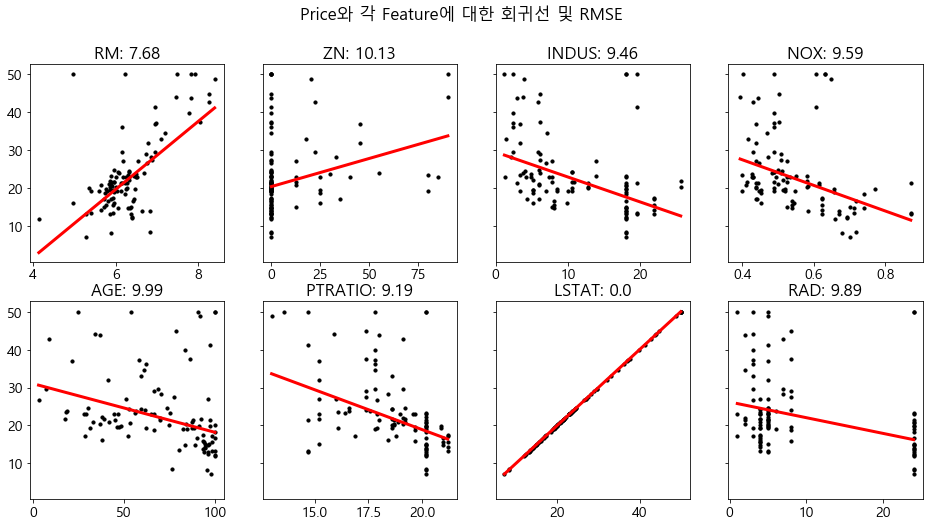

In [118]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2, sharey=True)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for index, feature in enumerate(lm_features):
    X = bostonDF[feature]
    x_train, x_test, y_train, y_test = \
        train_test_split(X, boston.target, test_size=0.2, 
                         random_state=19)
    rmse, weight, bias = single_regression(x_train, x_test, y_train, y_test)

    row = index // 4
    col = index % 4
    ax = axs[row][col]
    ax.scatter(x_test, y_test, s=10, c='black')
    xline = np.array([np.min(x_test), np.max(x_test)])
    yline = weight * xline + bias
    ax.plot(xline, yline, c='red', lw=3)
    ax.set_title(feature+': '+str(rmse))

fig.suptitle("Price와 각 Feature에 대한 회귀선 및 RMSE")
plt.show()

###  Price와 LSTAT의 다양한 회귀 방법에 따른 RMSE 값

In [120]:
x_train, x_test, y_train, y_test = \
    train_test_split(bostonDF['LSTAT'], boston.target, 
                     test_size=0.2, random_state=19)

##### 1. Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = slr.predict(x_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

##### 2. Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = dtr.predict(x_test.values.reshape(-1,1))
rmse_dtr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

##### 3. Support Vector Machine Regressor

In [123]:
from sklearn.svm import SVR
svr = SVR()

In [124]:
svr.fit(x_train.values.reshape(-1,1), y_train)
y_pred = svr.predict(x_test.values.reshape(-1,1))
rmse_svr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

In [125]:
print(rmse_lr, rmse_dtr, rmse_svr)

0.0 9.58 1.24


In [126]:
print(rmse_lr, rmse_dtr, rmse_svr)

0.0 9.58 1.24
